In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import data_loader
import network

training_data, _, test_data = data_loader.load_data_wrapper()
print(training_data[0][1].shape)
print(test_data[0][0].shape)

number of different labels for the output: 10
(10, 1)
(784, 1)


<ipython-input-3-9f0fcd499f8a>:5: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))


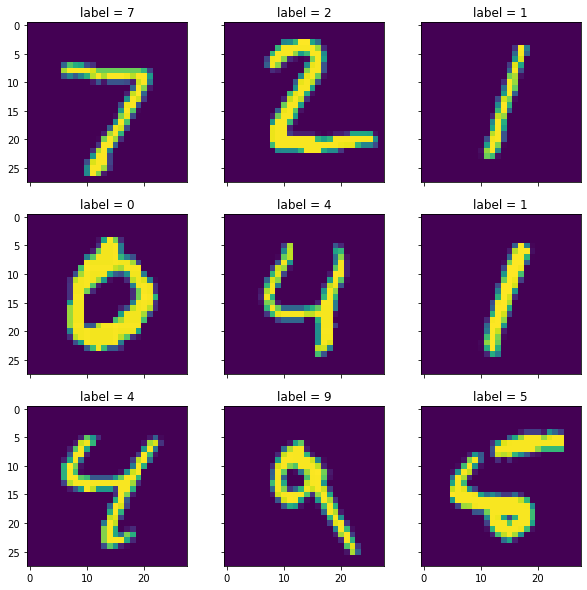

In [3]:
# a)
# plot a few of the images in the test data
L = 28
img_label_data = test_data[:9] # first 9 images of the test_data
fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))
for ((img, label), ax) in zip(img_label_data, axes.flatten()):
    ax.imshow(np.reshape(img, [L, L]))
    ax.set_title("label = "+str(label))
plt.show()

In [4]:
net = network.Network([784, 30, 10])  # (The network without working backpropag method!)
img, desired_result = training_data[0]
print("img.shape =", img.shape)
y = net.feedforward(img)
print("y.shape =", y.shape)

img.shape = (784, 1)
y.shape = (10, 1)


In [5]:
print("biases shape: ", [b.shape for b in net.biases])
print("weights shape: ", [w.shape for w in net.weights])

biases shape:  [(30, 1), (10, 1)]
weights shape:  [(30, 784), (10, 30)]


In [6]:
# implement the backpropagation for the network, solution from the book.
# full explanation: http://neuralnetworksanddeeplearning.com/chap2.html

class Network(network.Network):

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = network.sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * network.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = network.sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

In [7]:
net = Network([784, 30, 10])
net.SGD(training_data, 15, 64, 0.5, test_data=test_data)

Epoch  0:     8905 / 10000 = 89.0%
Epoch  1:     9062 / 10000 = 90.6%
Epoch  2:     9158 / 10000 = 91.6%
Epoch  3:     9192 / 10000 = 91.9%
Epoch  4:     9222 / 10000 = 92.2%
Epoch  5:     9250 / 10000 = 92.5%
Epoch  6:     9272 / 10000 = 92.7%
Epoch  7:     9288 / 10000 = 92.9%
Epoch  8:     9321 / 10000 = 93.2%
Epoch  9:     9323 / 10000 = 93.2%
Epoch  10:     9354 / 10000 = 93.5%
Epoch  11:     9348 / 10000 = 93.5%
Epoch  12:     9369 / 10000 = 93.7%
Epoch  13:     9386 / 10000 = 93.9%
Epoch  14:     9383 / 10000 = 93.8%


There are various techniques to make the training more reliable, chapter 3 of the Nielsen's book talks about them.
Yet, we have already seen the basic idea behind the neural networks (and machine learning in general): instead of designing an algorithm for a very specific task (like classifying handwritten digits), we generate a structure which can "learn" the
algorithm from a lot of example data provided (so-called supervised learning). This approach is "universal" in the sense that it can be applied to a lot of different problems, and in many cases even yields better results than writing a "code" in the traditional sense, e.g. it is nearly impossible to write a code recognising handwritten digits from image data.

In [8]:
net = Network([784, 30, 10])
net.SGD(training_data, 15, 10, 0.5, test_data=test_data) # smaller batch size

Epoch  0:     9262 / 10000 = 92.6%
Epoch  1:     9354 / 10000 = 93.5%
Epoch  2:     9405 / 10000 = 94.0%
Epoch  3:     9457 / 10000 = 94.6%
Epoch  4:     9518 / 10000 = 95.2%
Epoch  5:     9523 / 10000 = 95.2%
Epoch  6:     9542 / 10000 = 95.4%
Epoch  7:     9539 / 10000 = 95.4%
Epoch  8:     9566 / 10000 = 95.7%
Epoch  9:     9561 / 10000 = 95.6%
Epoch  10:     9578 / 10000 = 95.8%
Epoch  11:     9589 / 10000 = 95.9%
Epoch  12:     9598 / 10000 = 96.0%
Epoch  13:     9592 / 10000 = 95.9%
Epoch  14:     9589 / 10000 = 95.9%


### try again with a deeper network and more neurons

In [10]:
net = Network([784, 50, 30, 10]) # (training takes a long time!)
net.SGD(training_data, 15, 10, 0.5, test_data=test_data)

Epoch  0:     9249 / 10000 = 92.5%
Epoch  1:     9448 / 10000 = 94.5%
Epoch  2:     9498 / 10000 = 95.0%
Epoch  3:     9552 / 10000 = 95.5%
Epoch  4:     9592 / 10000 = 95.9%
Epoch  5:     9603 / 10000 = 96.0%
Epoch  6:     9643 / 10000 = 96.4%
Epoch  7:     9665 / 10000 = 96.7%
Epoch  8:     9672 / 10000 = 96.7%
Epoch  9:     9671 / 10000 = 96.7%
Epoch  10:     9663 / 10000 = 96.6%
Epoch  11:     9675 / 10000 = 96.8%
Epoch  12:     9678 / 10000 = 96.8%
Epoch  13:     9704 / 10000 = 97.0%
Epoch  14:     9683 / 10000 = 96.8%


The result is quite good. We can reach an accuracy better than 95% for unseen data. For more information, you can search mnist and see different approaches, for example, https://www.kaggle.com/c/digit-recognizer/discussion/61480

# Training with Monte Carlo data
### generate and load Monte carlo data

In [12]:
generate = False
try:
    training_data_ising, _, test_data_ising = data_loader.load_data_wrapper("mcIsing.pkl.gz")
except IOError: 
    # file not existent: need to generate data first
    generate = True
    
if generate:
    print("need to generate")
    import generate_mc_data
    data = generate_mc_data.generate_data()
    generate_mc_data.save_data(data, filename="mcIsing.pkl.gz")
    # retry loading
    training_data_ising, _, test_data_ising = data_loader.load_data_wrapper("mcIsing.pkl.gz")

number of different labels for the output: 3


<ipython-input-13-8bbfc079fb56>:4: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))


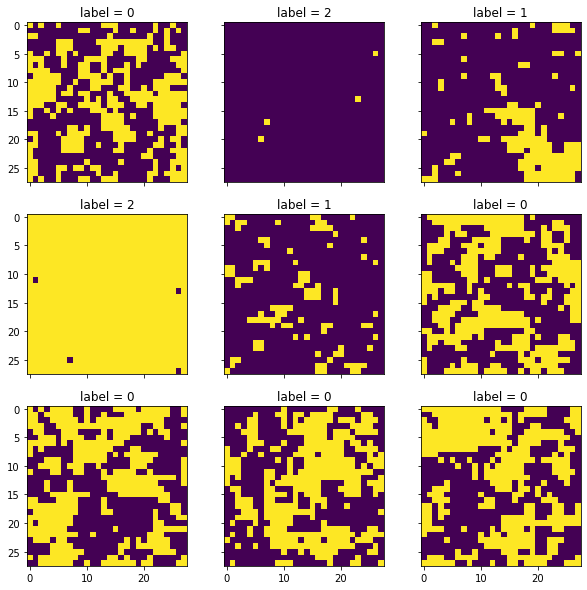

In [13]:
# plot a few of the images in the test data
L = 28
img_label_data = test_data_ising[:9]
fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))
for ((img, label), ax) in zip(img_label_data, axes.flatten()):
    ax.imshow(np.reshape(img, [L, L]))
    ax.set_title("label = "+str(label))
plt.show()

### associate labels to temperatures
|label|temp. T| phase| 
|---|----|---|
|0    |3      |disordered|
|1    |2.3    |close to critical, already ordered for the given system size|
|2    |1.5    |ordered, few fluctuations|

### train a network

In [14]:
net = Network([784, 30, 3])
net.SGD(training_data_ising, 15, 10, 0.5, test_data=test_data_ising)

Epoch  0:     4525 / 6000 = 75.4%
Epoch  1:     5101 / 6000 = 85.0%
Epoch  2:     5430 / 6000 = 90.5%
Epoch  3:     5529 / 6000 = 92.2%
Epoch  4:     5364 / 6000 = 89.4%
Epoch  5:     5564 / 6000 = 92.7%
Epoch  6:     5619 / 6000 = 93.7%
Epoch  7:     5399 / 6000 = 90.0%
Epoch  8:     5588 / 6000 = 93.1%
Epoch  9:     5586 / 6000 = 93.1%
Epoch  10:     5591 / 6000 = 93.2%
Epoch  11:     5575 / 6000 = 92.9%
Epoch  12:     5603 / 6000 = 93.4%
Epoch  13:     5610 / 6000 = 93.5%
Epoch  14:     5587 / 6000 = 93.1%


note that we come above 66%, i.e. we classify at least some images of each temperature correctly!

In [15]:
net = Network([784, 10, 10, 10, 3])
net.SGD(training_data_ising, 10, 30, 0.3, test_data=test_data_ising)
net.SGD(training_data_ising, 10, 30, 0.03, test_data=test_data_ising)

Epoch  0:     3003 / 6000 = 50.0%
Epoch  1:     4008 / 6000 = 66.8%
Epoch  2:     4391 / 6000 = 73.2%
Epoch  3:     5055 / 6000 = 84.2%
Epoch  4:     5164 / 6000 = 86.1%
Epoch  5:     5458 / 6000 = 91.0%
Epoch  6:     5559 / 6000 = 92.7%
Epoch  7:     4834 / 6000 = 80.6%
Epoch  8:     5489 / 6000 = 91.5%
Epoch  9:     5449 / 6000 = 90.8%
Epoch  0:     5580 / 6000 = 93.0%
Epoch  1:     5578 / 6000 = 93.0%
Epoch  2:     5561 / 6000 = 92.7%
Epoch  3:     5550 / 6000 = 92.5%
Epoch  4:     5559 / 6000 = 92.7%
Epoch  5:     5564 / 6000 = 92.7%
Epoch  6:     5561 / 6000 = 92.7%
Epoch  7:     5566 / 6000 = 92.8%
Epoch  8:     5560 / 6000 = 92.7%
Epoch  9:     5563 / 6000 = 92.7%


a deeper network with the same number of neurons is significantly better!

In [16]:
net = Network([784, 50, 30, 20, 3]) # and maybe more neurons?
net.SGD(training_data_ising, 10, 30, 0.3, test_data=test_data_ising)
net.SGD(training_data_ising, 10, 30, 0.03, test_data=test_data_ising)

Epoch  0:     4778 / 6000 = 79.6%
Epoch  1:     5561 / 6000 = 92.7%
Epoch  2:     5701 / 6000 = 95.0%
Epoch  3:     5576 / 6000 = 92.9%
Epoch  4:     5726 / 6000 = 95.4%
Epoch  5:     5711 / 6000 = 95.2%
Epoch  6:     5708 / 6000 = 95.1%
Epoch  7:     5716 / 6000 = 95.3%
Epoch  8:     5712 / 6000 = 95.2%
Epoch  9:     5711 / 6000 = 95.2%
Epoch  0:     5713 / 6000 = 95.2%
Epoch  1:     5716 / 6000 = 95.3%
Epoch  2:     5713 / 6000 = 95.2%
Epoch  3:     5711 / 6000 = 95.2%
Epoch  4:     5713 / 6000 = 95.2%
Epoch  5:     5712 / 6000 = 95.2%
Epoch  6:     5711 / 6000 = 95.2%
Epoch  7:     5712 / 6000 = 95.2%
Epoch  8:     5713 / 6000 = 95.2%
Epoch  9:     5712 / 6000 = 95.2%


## Bonus: can we distinguish more temperatures?


In [18]:
import generate_mc_data
temps = [3., 2.5, 2.0, 1.5]
data = generate_mc_data.generate_data(temps=temps, N_training=5000)
train_mc_moreT, _, test_mc_more_T = data_loader.load_data_wrapper(data)

generate data for T= 3.000
generate data for T= 2.500
generate data for T= 2.000
generate data for T= 1.500
number of different labels for the output: 4


In [19]:
net = Network([784, 50, 30, len(temps)]) # higher number of neurons & deep!
net.SGD(train_mc_moreT, 10, 10, 0.2, test_data=test_mc_more_T)
net.SGD(train_mc_moreT, 10, 10, 0.02, test_data=test_mc_more_T)

Epoch  0:     2364 / 4000 = 59.1%
Epoch  1:     2143 / 4000 = 53.6%
Epoch  2:     2372 / 4000 = 59.3%
Epoch  3:     2645 / 4000 = 66.1%
Epoch  4:     2617 / 4000 = 65.4%
Epoch  5:     3061 / 4000 = 76.5%
Epoch  6:     2711 / 4000 = 67.8%
Epoch  7:     2969 / 4000 = 74.2%
Epoch  8:     3069 / 4000 = 76.7%
Epoch  9:     3103 / 4000 = 77.6%
Epoch  0:     3039 / 4000 = 76.0%
Epoch  1:     3070 / 4000 = 76.8%
Epoch  2:     3102 / 4000 = 77.5%
Epoch  3:     3054 / 4000 = 76.3%
Epoch  4:     3086 / 4000 = 77.2%
Epoch  5:     3135 / 4000 = 78.4%
Epoch  6:     3112 / 4000 = 77.8%
Epoch  7:     3082 / 4000 = 77.0%
Epoch  8:     3072 / 4000 = 76.8%
Epoch  9:     3103 / 4000 = 77.6%


<ipython-input-20-57ebd4a13d24>:4: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))


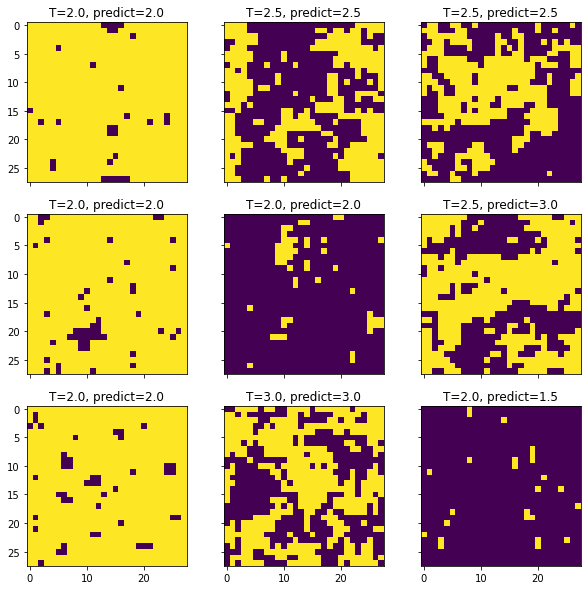

In [20]:
# plot a few of the images in the test data along with the output of the network
L = 28
img_label_data = test_mc_more_T[215:215+9] #some of the images
fig, axes = plt.subplots(3, 3, True, True, figsize=(10, 10))
for ((img, label), ax) in zip(img_label_data, axes.flatten()):
    ax.imshow(np.reshape(img, [L, L]))
    predict = np.argmax(net.feedforward(img)) # check what the network predicts
    ax.set_title("T={T:.1f}, predict={predict:.1f}".format(T=temps[label], predict=temps[predict]))
plt.show()

## interpretation
It's very hard to differentiate between T=2.5 and T=3.: both are essentially unordered (magnetization ~= 0), and can only be distinguished from the correlations. This is hard to do for a 28x28 image - it might work better for larger systems. 
We don't expect that the net can learn to distinguish all of them, since sometimes , the T=3. Monte Carlo simulation produces images which are also highly likely at T=2.5 and vice verca - their distributions have overlap.
The images of T=1.5 and T=2.0 also might look quite similar, right?
Hence, achieving a correct classification of more than 3/4=75% is already quite remarkable!